In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('Data/cancer-probabilities.csv')
df

,Sr No.,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
0,1,Heavy,Frequent,Low,Low,Low,0.80
1,2,Occasional,Moderate,High,High,High,0.20
2,3,None,None,High,High,High,0.10
3,4,Heavy,Frequent,Low,Low,Low,0.90
4,5,Moderate,Occasional,Medium,Medium,Medium,0.40
5,6,None,None,High,High,High,0.05
6,7,Heavy,Frequent,Low,Low,Low,0.75
7,8,Moderate,Occasional,Medium,Medium,Medium,0.30
8,9,None,None,High,High,High,0.02
9,10,Heavy,Frequent,Low,Low,Low,0.85


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sr No.                 50 non-null     int64  
 1   Smoking Habit          50 non-null     object 
 2   Drinking Habit         50 non-null     object 
 3   Biking Habit           50 non-null     object 
 4   Walking Habit          50 non-null     object 
 5   Jogging Habit          50 non-null     object 
 6   Probability of Cancer  50 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [29]:
df.drop('Sr No.',axis=1,inplace=True)

In [30]:
for index in df:
    print(index,df[index].unique())

Smoking Habit ['Heavy' 'Occasional' 'None' 'Moderate']
Drinking Habit ['Frequent' 'Moderate' 'None' 'Occasional']
Biking Habit ['Low' 'High' 'Medium']
Walking Habit ['Low' 'High' 'Medium']
Jogging Habit ['Low' 'High' 'Medium']
Probability of Cancer [0.8  0.2  0.1  0.9  0.4  0.05 0.75 0.3  0.02 0.85 0.45 0.01 0.35 0.03
 0.7 ]


In [31]:
df['Smoking Habit'].value_counts().unique()

array([17, 16,  1], dtype=int64)

In [32]:
smokin = df['Smoking Habit'].unique()

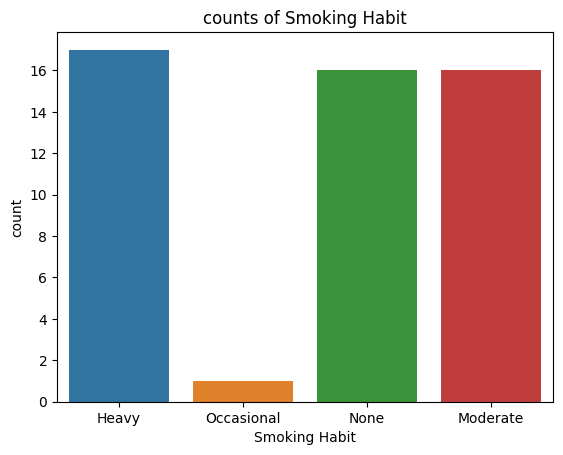

In [33]:
#plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Smoking Habit')
plt.title('counts of Smoking Habit')
plt.show()

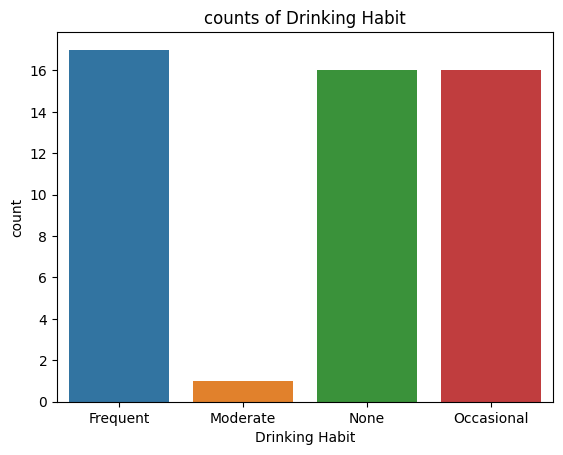

In [34]:
sns.countplot(data=df, x='Drinking Habit')
plt.title('counts of Drinking Habit')
plt.show()

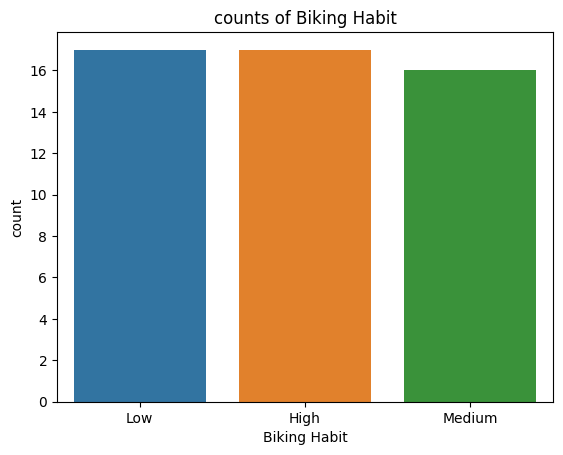

In [35]:
sns.countplot(data=df, x='Biking Habit')
plt.title('counts of Biking Habit')
plt.show()

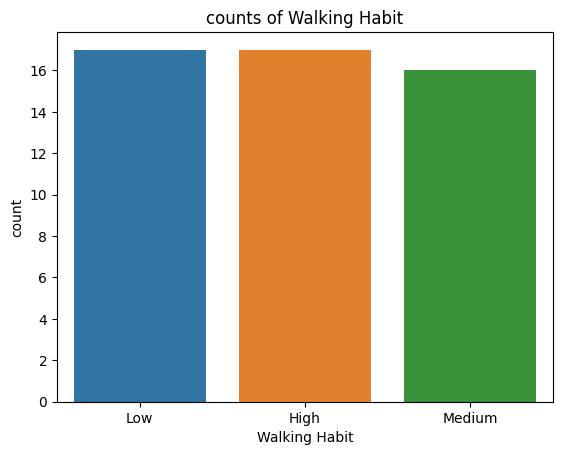

In [36]:
sns.countplot(data=df, x='Walking Habit')
plt.title('counts of Walking Habit')
plt.show()

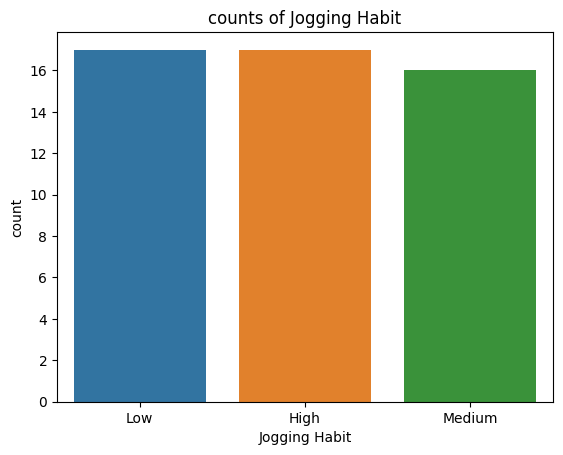

In [37]:
sns.countplot(data=df, x='Jogging Habit')
plt.title('counts of Jogging Habit')
plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['Smoking Habit', 'Drinking Habit', 'Biking Habit', 'Walking Habit',
       'Jogging Habit'],
      dtype='object')

In [40]:
cat_col = df[['Smoking Habit','Drinking Habit', 'Biking Habit', 'Walking Habit', 'Jogging Habit']]
for col in cat_col:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"'{col}' column not found in df")

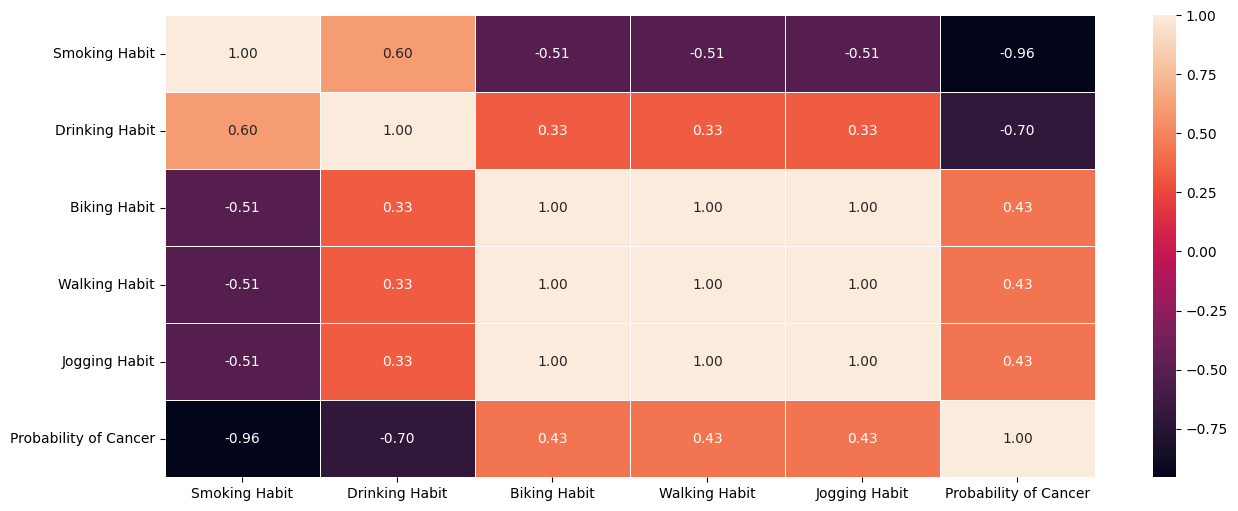

In [41]:
df_c = df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(df_c, annot=True, fmt='0.2f', linewidth=.5)
plt.show()

Q. Which One Is Better for Your Data?
   - Ordinal Encoding is likely a better fit because the habits naturally have an ordered scale (e.g., Low < Medium < High).
   - One-Hot Encoding can be useful if you're unsure of the ranking or don't want to impose any order, but it may increase the dimensionality of your dataset.

In [42]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

object_columns = df.select_dtypes(include=['object']).columns
object_columns

df[['Smoking Habit', 'Drinking Habit', 'Biking Habit', 'Walking Habit',
       'Jogging Habit']] = ordinal_encoder.fit_transform(df[['Smoking Habit', 'Drinking Habit', 'Biking Habit', 'Walking Habit',
       'Jogging Habit']])

In [44]:
from sklearn.model_selection import train_test_split
x = df.drop('Probability of Cancer',axis=1)
y = df['Probability of Cancer']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=51)
#_train,y_train,x_test,y_test= train_test_split(x,y,test_size=0.2,random_state=51)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40, 5)
(40,)
(10, 5)
(10,)


In [46]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.transform(x_test)

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [48]:
models = {
    " LinearRegression" : LinearRegression(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "SVR" : SVR(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor()
}

In [49]:
for modle_name,modle in models.items():
    modle.fit(x_train_scale,y_train)
    y_pred = modle.predict(x_test_scale)
    accuracy = r2_score(y_test, y_pred)
    #report = classification_report(y_test,y_pred)
    print(f"{modle_name} - Accuracy: {accuracy:.2f}")
    #print(f"Classification Report:\n{report}\n")

 LinearRegression - Accuracy: 0.95
KNeighborsRegressor - Accuracy: 0.93
SVR - Accuracy: 0.94
DecisionTreeRegressor - Accuracy: 0.95
RandomForestRegressor - Accuracy: 0.95
